In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import *
from sklearn.linear_model import Lasso
from cleaning import *
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics

In [4]:
# Source: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

data = pd.read_csv('OnlineNewsPopularity.csv')

In [8]:
data = data.rename(columns=lambda x: x.strip())
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [9]:
df = data[['shares','timedelta','n_tokens_title', 'n_tokens_content','kw_avg_avg','n_unique_tokens','num_hrefs','num_imgs', 'num_videos', 'num_keywords', 
           'self_reference_avg_sharess','data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
           'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 
           'data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world', 'is_weekend',
           'rate_positive_words','rate_negative_words', 'avg_positive_polarity', 'avg_negative_polarity',
           'title_subjectivity','title_sentiment_polarity']]

In [11]:
columns_list = list(df.columns)
len(columns_list)

27

In [12]:
df['log_shares']=np.log(df['shares'])

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
delete = df.loc[(df['n_unique_tokens'] == 701)]

In [14]:
df.drop(delete.index, axis=0, inplace=True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
y = np.log(df['shares'])

In [16]:
X = df.drop('shares', axis=1)

In [17]:
x_scale = X.apply(lambda x: (x - np.min(x))/(np.max(x)-np.min(x)))

In [18]:
df_scale = pd.concat([x_scale, y], axis=1)

In [19]:
df_scale.head()

timedelta  n_tokens_title  n_tokens_content  kw_avg_avg  n_unique_tokens  \
0        1.0        0.476190          0.025844         0.0         0.663594   
1        1.0        0.333333          0.030092         0.0         0.604743   
2        1.0        0.333333          0.024900         0.0         0.575130   
3        1.0        0.333333          0.062662         0.0         0.503788   
4        1.0        0.523810          0.126505         0.0         0.415646   

   num_hrefs  num_imgs  num_videos  num_keywords  self_reference_avg_sharess  \
0   0.013158  0.007812         0.0      0.444444                    0.000588   
1   0.009868  0.007812         0.0      0.333333                    0.000000   
2   0.009868  0.007812         0.0      0.555556                    0.001089   
3   0.029605  0.007812         0.0      0.666667                    0.000000   
4   0.062500  0.156250         0.0      0.666667                    0.003737   

   ...  data_channel_is_world  is_weekend  rate_positive_words  \
0  ...                    0.0         0.0             0.769231   
1  ...                    0.0         0.0             0.733333   
2  ...                    0.0         0.0             0.857143   
3  ...                    0.0         0.0             0.666667   
4  ...                    0.0         0.0             0.860215   

   rate_negative_words  avg_positive_polarity  avg_negative_polarity  \
0             0.230769               0.378636               0.650000   
1             0.266667               0.286915               0.881250   
2             0.142857               0.495833               0.533333   
3             0.333333               0.385965               0.630303   
4             0.139785               0.411127               0.779808   

   title_subjectivity  title_sentiment_polarity  log_shares    shares  
0            0.500000                  0.406250    0.467949  6.385194  
1            0.000000                  0.500000    0.481248  6.566672  
2            0.000000                  0.500000    0.535960  7.313220  
3            0.000000                  0.500000    0.519607  7.090077  
4            0.454545                  0.568182    0.456176  6.224558  

[5 rows x 28 columns]

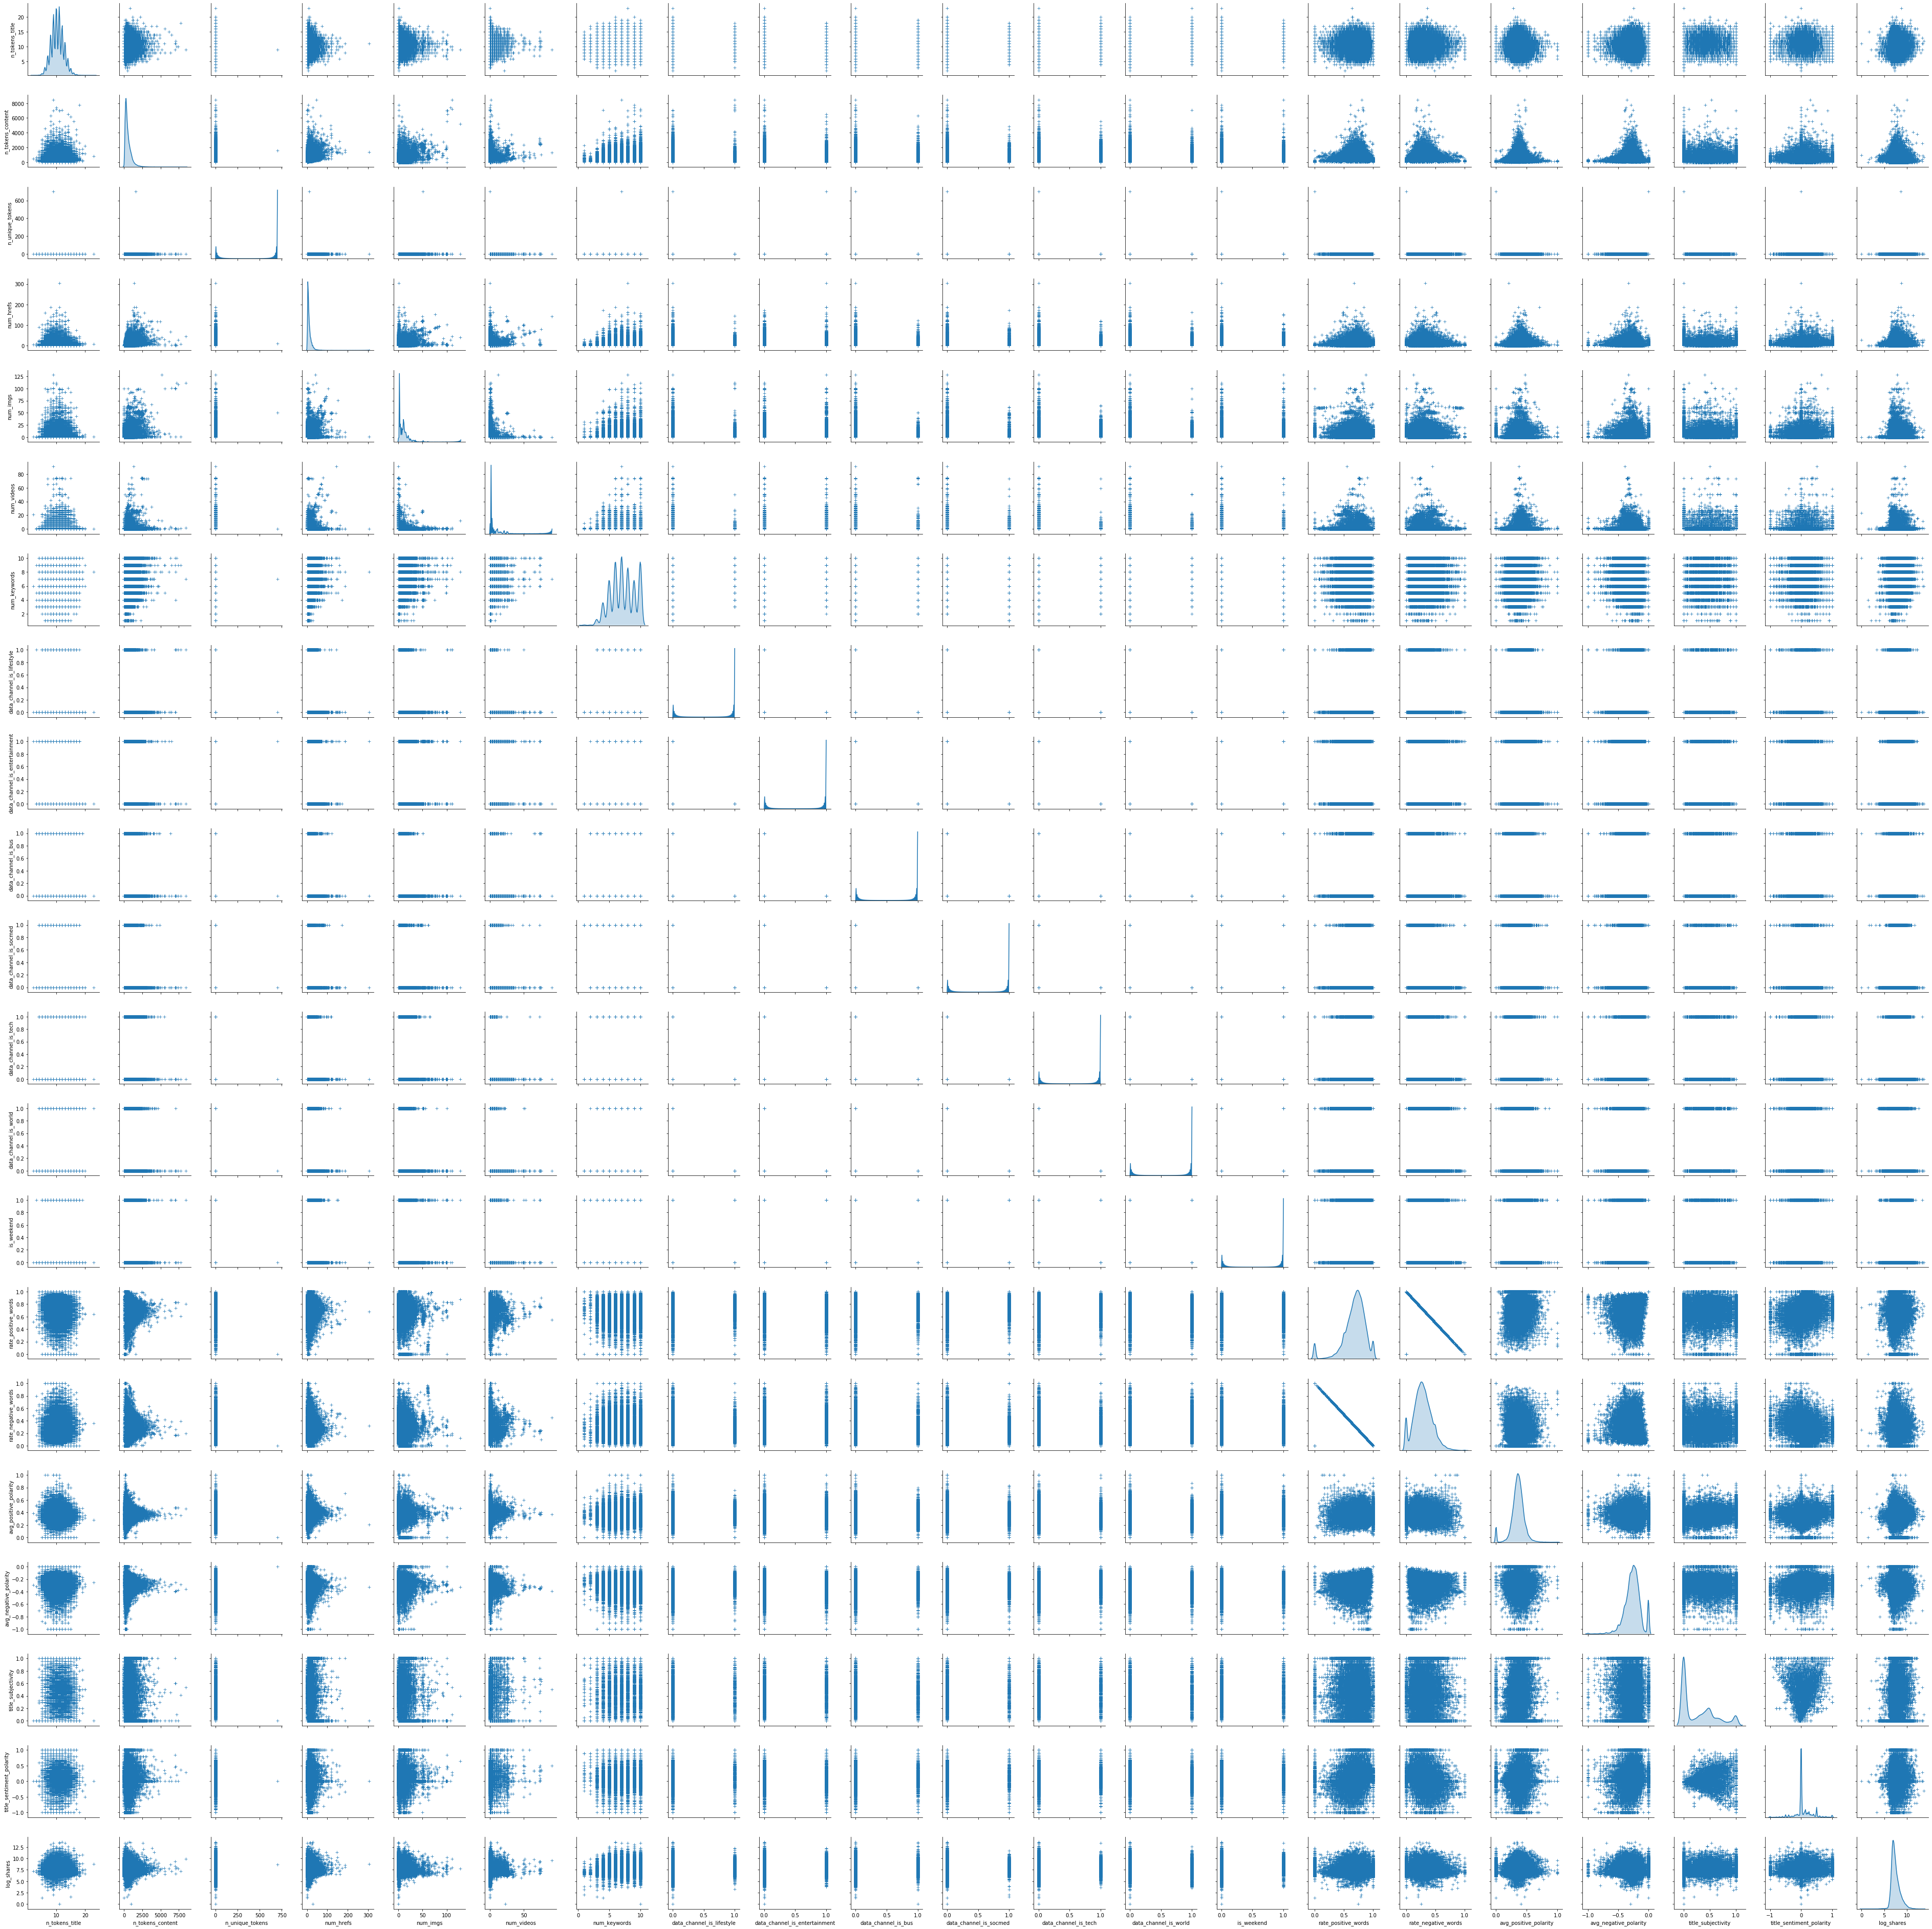

In [63]:
sns.pairplot(df, diag_kind="kde", markers="+")

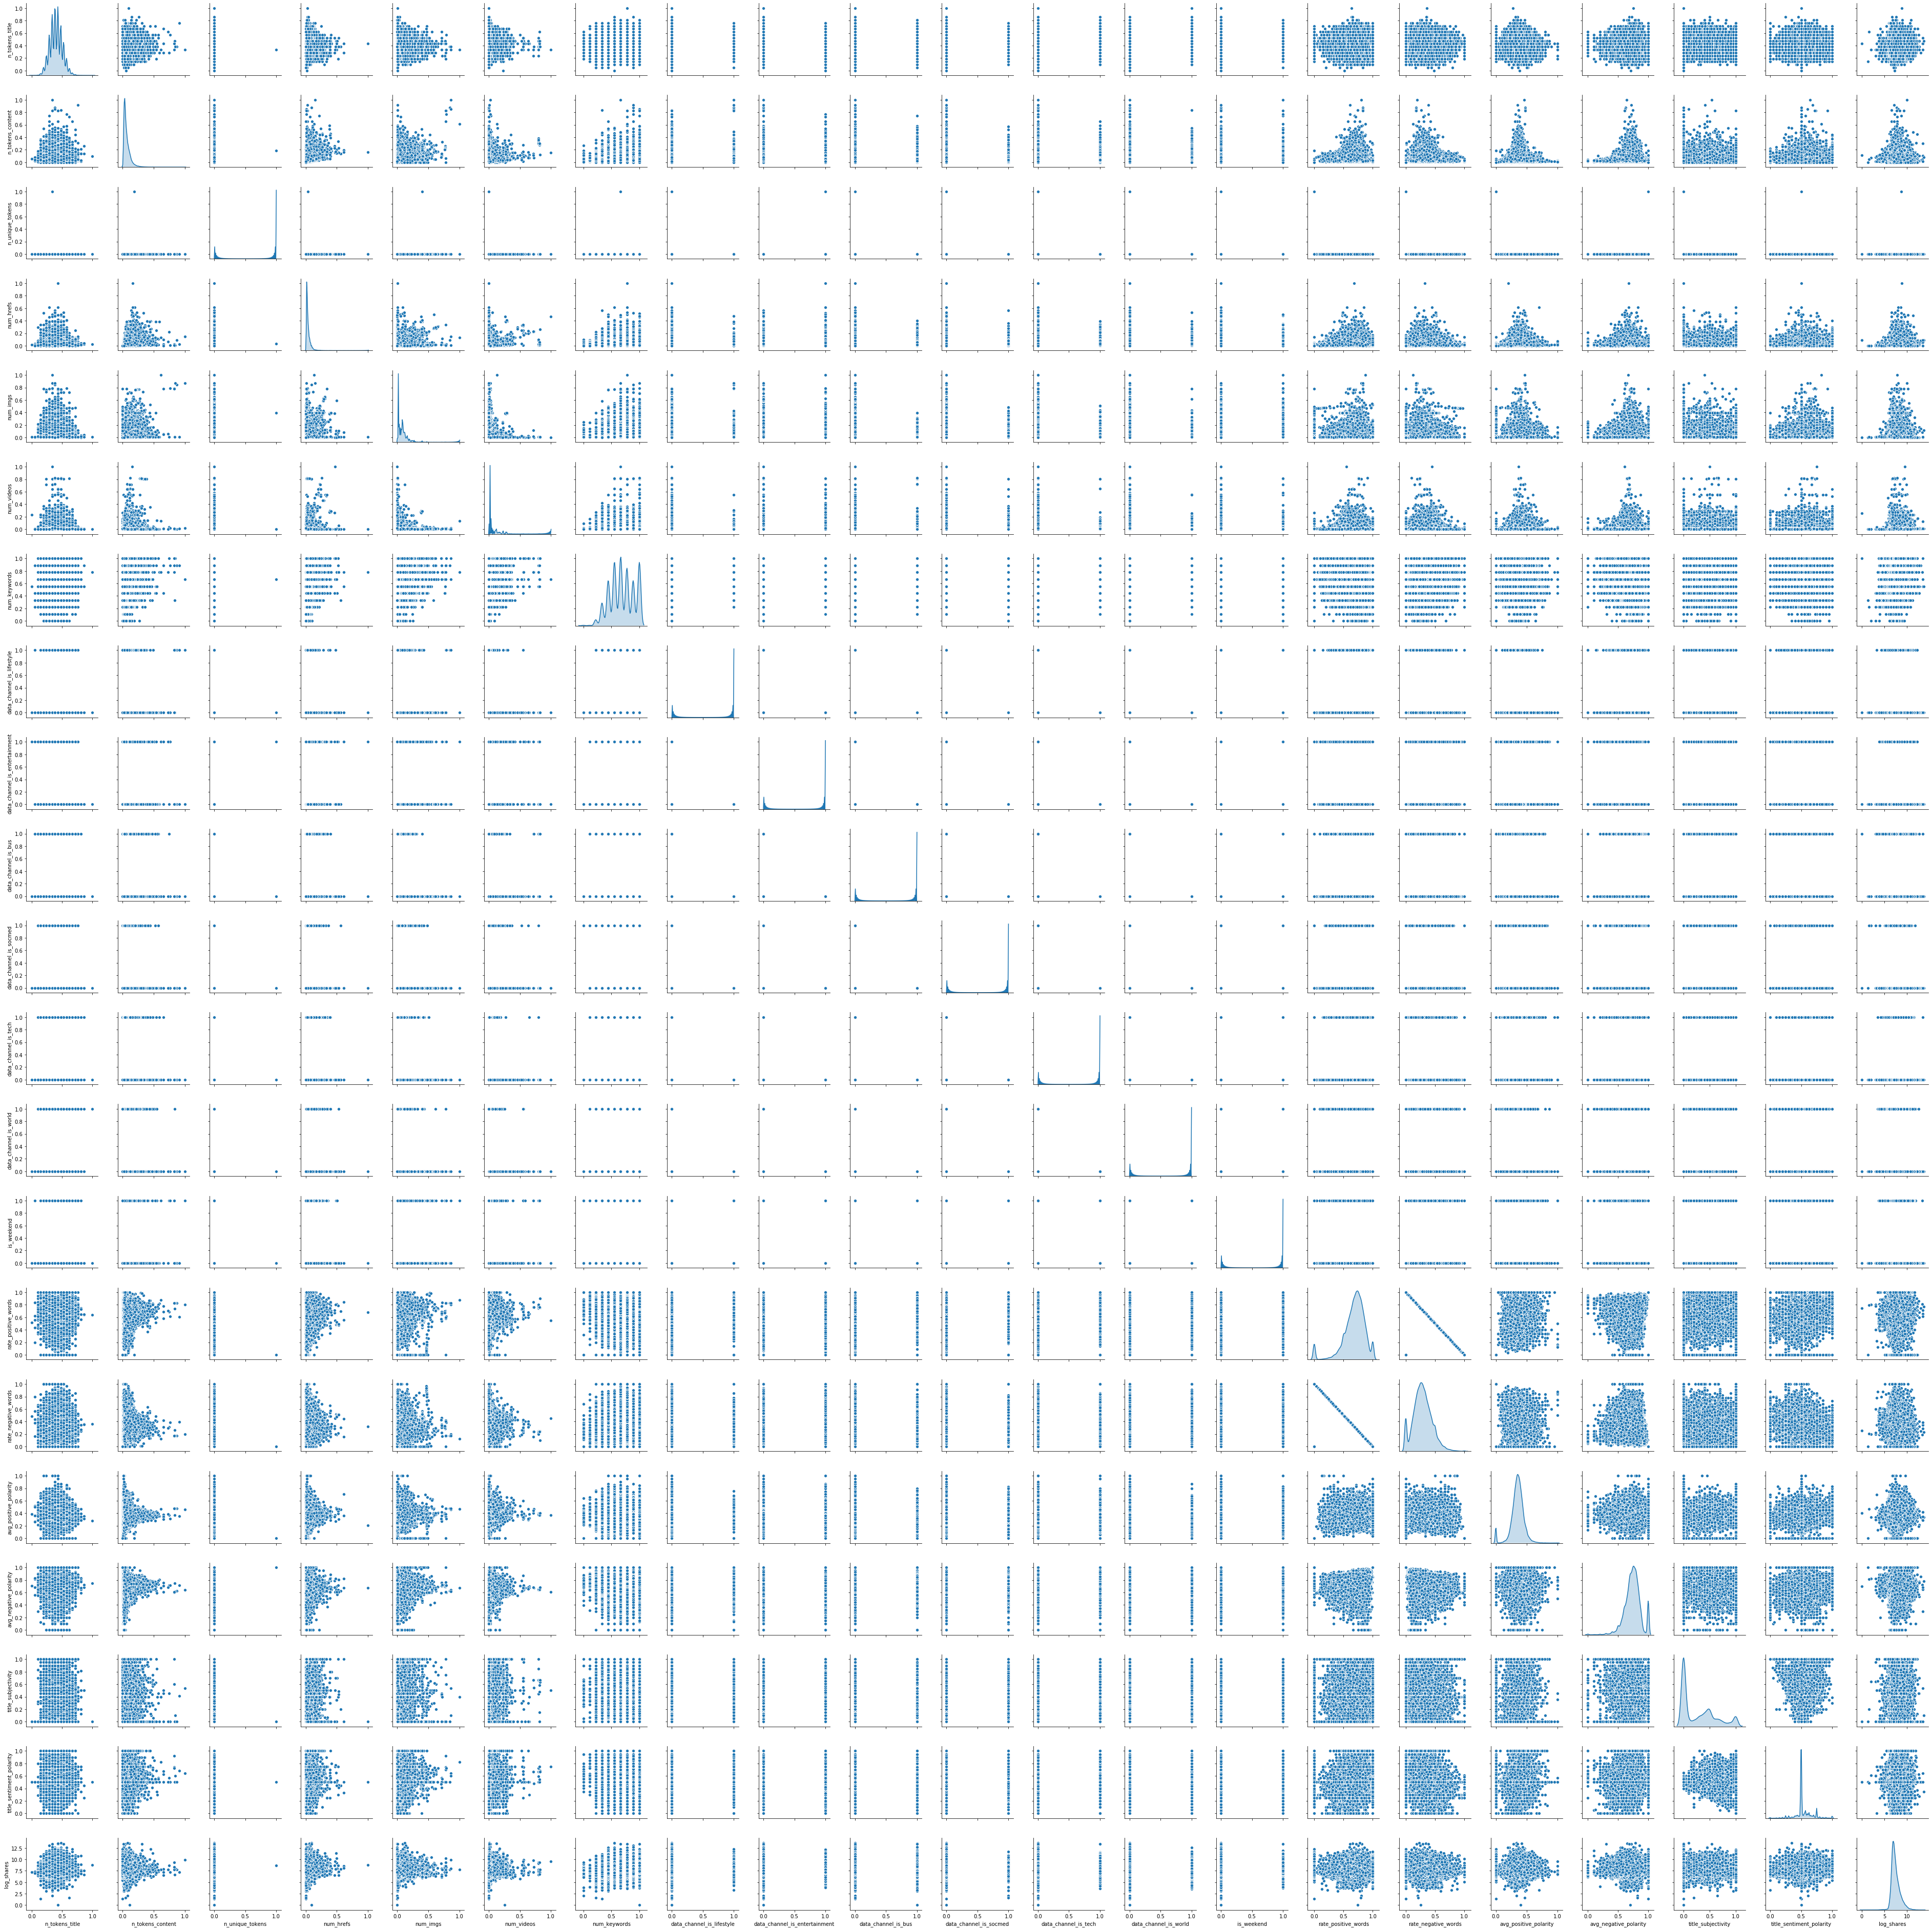

In [81]:
sns.pairplot(df_scale, diag_kind='kde')

In [137]:
channels = df_scale[['log_shares','data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
           'data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world']]

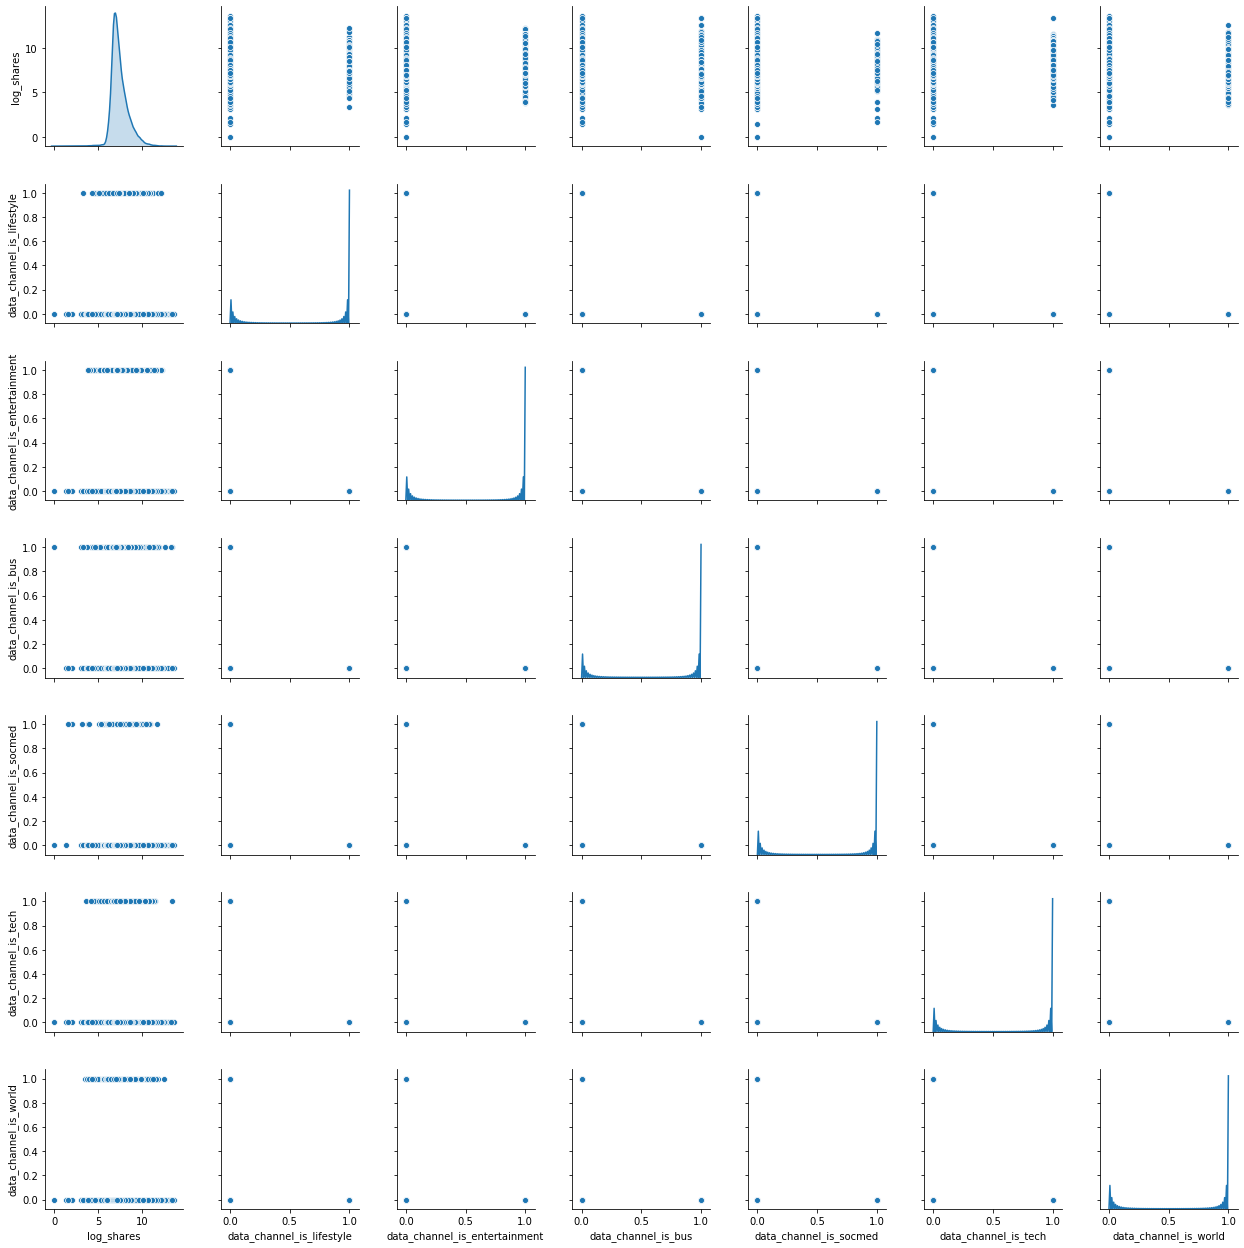

In [138]:
sns.pairplot(channels, diag_kind='kde')

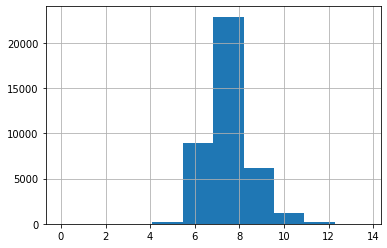

In [51]:
# df['rate_positive_words'].hist()
# df['rate_negative_words'].hist()
df['log_shares'].hist()

In [115]:
df.std() 


shares                           11627.090592
timedelta                          214.163808
n_tokens_title                       2.114052
n_tokens_content                   471.085404
kw_avg_avg                        1318.166544
n_unique_tokens                      0.137112
num_hrefs                           11.332160
num_imgs                             8.306262
num_videos                           4.107902
num_keywords                         1.909154
self_reference_avg_sharess       24211.637462
data_channel_is_lifestyle            0.223932
data_channel_is_entertainment        0.382508
data_channel_is_bus                  0.364613
global_sentiment_polarity            0.096930
global_rate_positive_words           0.017428
global_rate_negative_words           0.010828
data_channel_is_socmed               0.234874
data_channel_is_tech                 0.388549
data_channel_is_world                0.409133
is_weekend                           0.337315
rate_positive_words               

## Linear Regression Test

In [37]:
# Scale X df
y = df['log_shares']
X = df_scale

In [46]:
X = X.drop('log_shares', axis=1)

In [85]:
len(X.columns)

26

In [48]:
# Split Train-Test data:

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [49]:
lr = LinearRegression()

In [50]:
model = lr.fit(X_train, y_train)

In [51]:
model.score(X_test,y_test)

0.10618725588171007

In [52]:
y_pred = model.predict(X)

In [53]:
mse = mean_squared_error(y, y_pred)
mse

0.777925381525685

In [54]:
model.coef_

array([ 0.0914416 ,  0.09862387,  0.11094588,  4.72281503, -0.21481437,
        1.07792411,  0.29858616,  0.13721687,  0.14816651,  1.91188407,
       -0.0718079 , -0.30738086, -0.1373626 ,  0.01121037, -0.11960635,
        0.3674555 ,  0.14690627,  0.02400549, -0.30553907,  0.25760839,
       -0.03517829, -0.26279283,  0.07256692, -0.23680662,  0.08104391,
        0.11816988])

In [55]:
lasso = Lasso()

In [56]:
la_model = lasso.fit(X_train,y_train)

In [57]:
la_model.score(X_test,y_test)

-0.000167000072409218

In [58]:
la_model.coef_

array([ 0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
        0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0.])

#### Cross Validation

In [84]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline


0.09998718516845355

### Linear Regression: no channel variables

In [59]:
df_scale.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'kw_avg_avg',
       'n_unique_tokens', 'num_hrefs', 'num_imgs', 'num_videos',
       'num_keywords', 'self_reference_avg_sharess',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'is_weekend', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'avg_negative_polarity',
       'title_subjectivity', 'title_sentiment_polarity', 'log_shares'],
      dtype='object')

### Polynomial Regression Test

In [60]:
poly = PolynomialFeatures(2)

In [67]:
X_fin = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [86]:
laic = LassoLarsIC()

In [96]:
model = laic.fit(X_fin, y_train)
model_test = laic.predict(X_test_poly)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=3.992e-04, with an active set of 9 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=2.815e-04, with an active set of 15 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 31 iterations, i.e. alpha=1.915e-04, with an activ

In [97]:
model.score(X_test_poly, y_test)

0.11650900700757294

In [99]:
model.coef_;

### Variance Threshold

In [107]:
threshold_ranges = np.linspace(0,0.2,num=6)
for thresh in threshold_ranges:
    print(thresh)
    selector = VarianceThreshold(thresh)
    reduced_feature_train = selector.fit_transform(X_fin)
    reduced_feature_test = selector.transform(X_test_poly)
    lr = LinearRegression()
    lr.fit(reduced_feature_train,y_train)
    run_model(lr,reduced_feature_train,reduced_feature_test,y_train,y_test)

0.0
Training R^2 : 0.14997928898708812
Training Root Mean Square Error 0.8577022215304443

----------------

Testing R^2 : -128361674077335.16
Testing Root Mean Square Error 10546966.961037511
0.04
Training R^2 : 0.08185506945007492
Training Root Mean Square Error 0.8914097941576887

----------------

Testing R^2 : 0.08056404215358304
Testing Root Mean Square Error 0.8926282791779244
0.08
Training R^2 : 0.06934714812650533
Training Root Mean Square Error 0.8974611083571274

----------------

Testing R^2 : 0.06893151571002931
Testing Root Mean Square Error 0.898257211527332
0.12
Training R^2 : 0.05228059347607528
Training Root Mean Square Error 0.9056526621578045

----------------

Testing R^2 : 0.055551535645508854
Testing Root Mean Square Error 0.9046884206873301
0.16
Training R^2 : 0.022898379511246625
Training Root Mean Square Error 0.919584511649456

----------------

Testing R^2 : 0.02312672975549812
Testing Root Mean Square Error 0.9200872498756534
0.2


ValueError: No feature in X meets the variance threshold 0.20000

In [103]:
def run_model(model,X_train,X_test,y_train,y_test):
    print('Training R^2 :',model.score(X_train,y_train))
    y_pred_train = model.predict(X_train)
    print('Training Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
    print('\n----------------\n')
    print('Testing R^2 :',model.score(X_test,y_test))
    y_pred_test = model.predict(X_test)
    print('Testing Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

#### KBest

In [117]:
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
selector = SelectKBest(score_func=f_regression)
X_k_best_train = selector.fit_transform(X_fin, y_train)
X_k_best_test= selector.transform(X_test_poly)
lr = LinearRegression()
lr.fit(X_k_best_train ,y_train)
run_model(lr,X_k_best_train,X_k_best_test,y_train,y_test)

Training R^2 : 0.056712607212688004
Training Root Mean Square Error 0.9035325363427833

----------------

Testing R^2 : 0.064196239669571
Testing Root Mean Square Error 0.9005385160019926


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/flatironschool/anaconda3

In [ ]:
selector = SelectKBest(score_func=mutual_info_regression)
X_k_best_train = selector.fit_transform(X_fin, y_train)
X_k_best_test= selector.transform(X_test_poly)
lr = LinearRegression()
lr.fit(X_k_best_train ,y_train)
run_model(lr,X_k_best_train,X_k_best_test,y_train,y_test)